In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 23.3 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov8:: 100%|██████████| 1338/1338 [00:00<00:00, 1922.81it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
dataset.location

'/content/football-players-detection-1'

In [5]:
!yolo task = detect mode = train model = yolov8m.pt data = {dataset.location}/data.yaml epochs = 100 imgsz = 640

100% 49.7M/49.7M [00:00<00:00, 135MB/s]
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/football-players-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

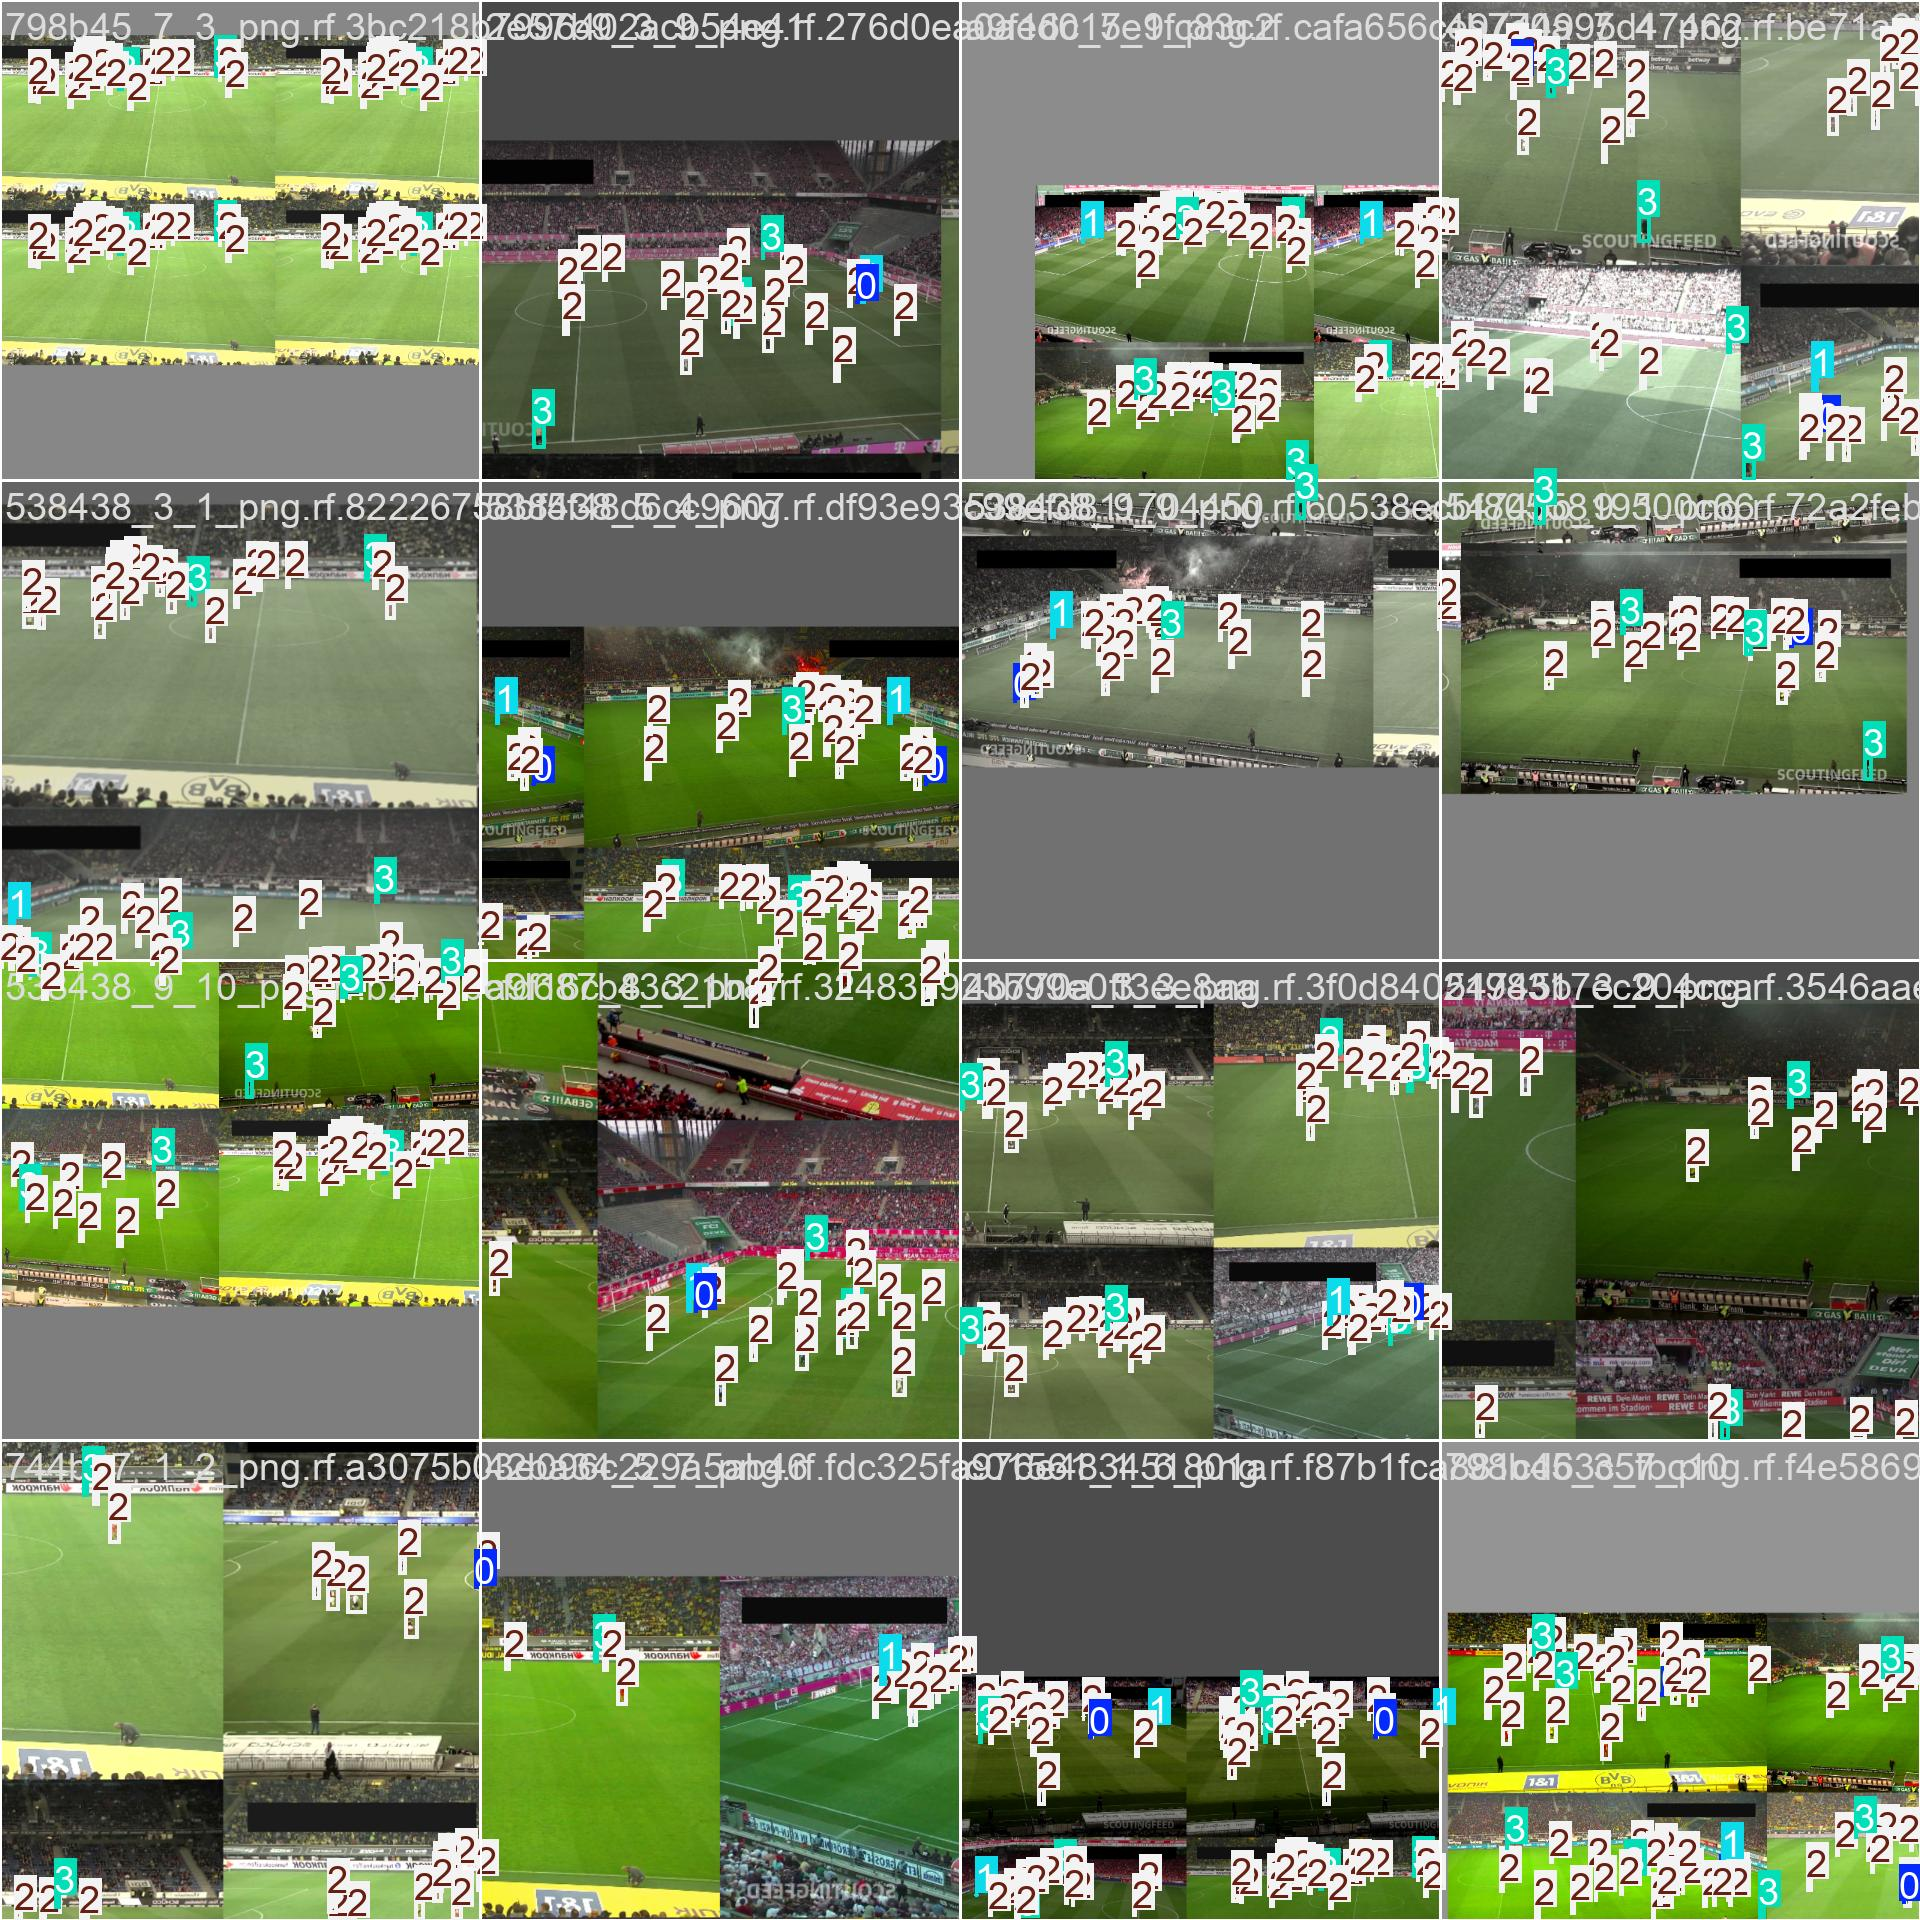

In [6]:
from IPython.display import Image
Image("/content/runs/detect/train/train_batch0.jpg")

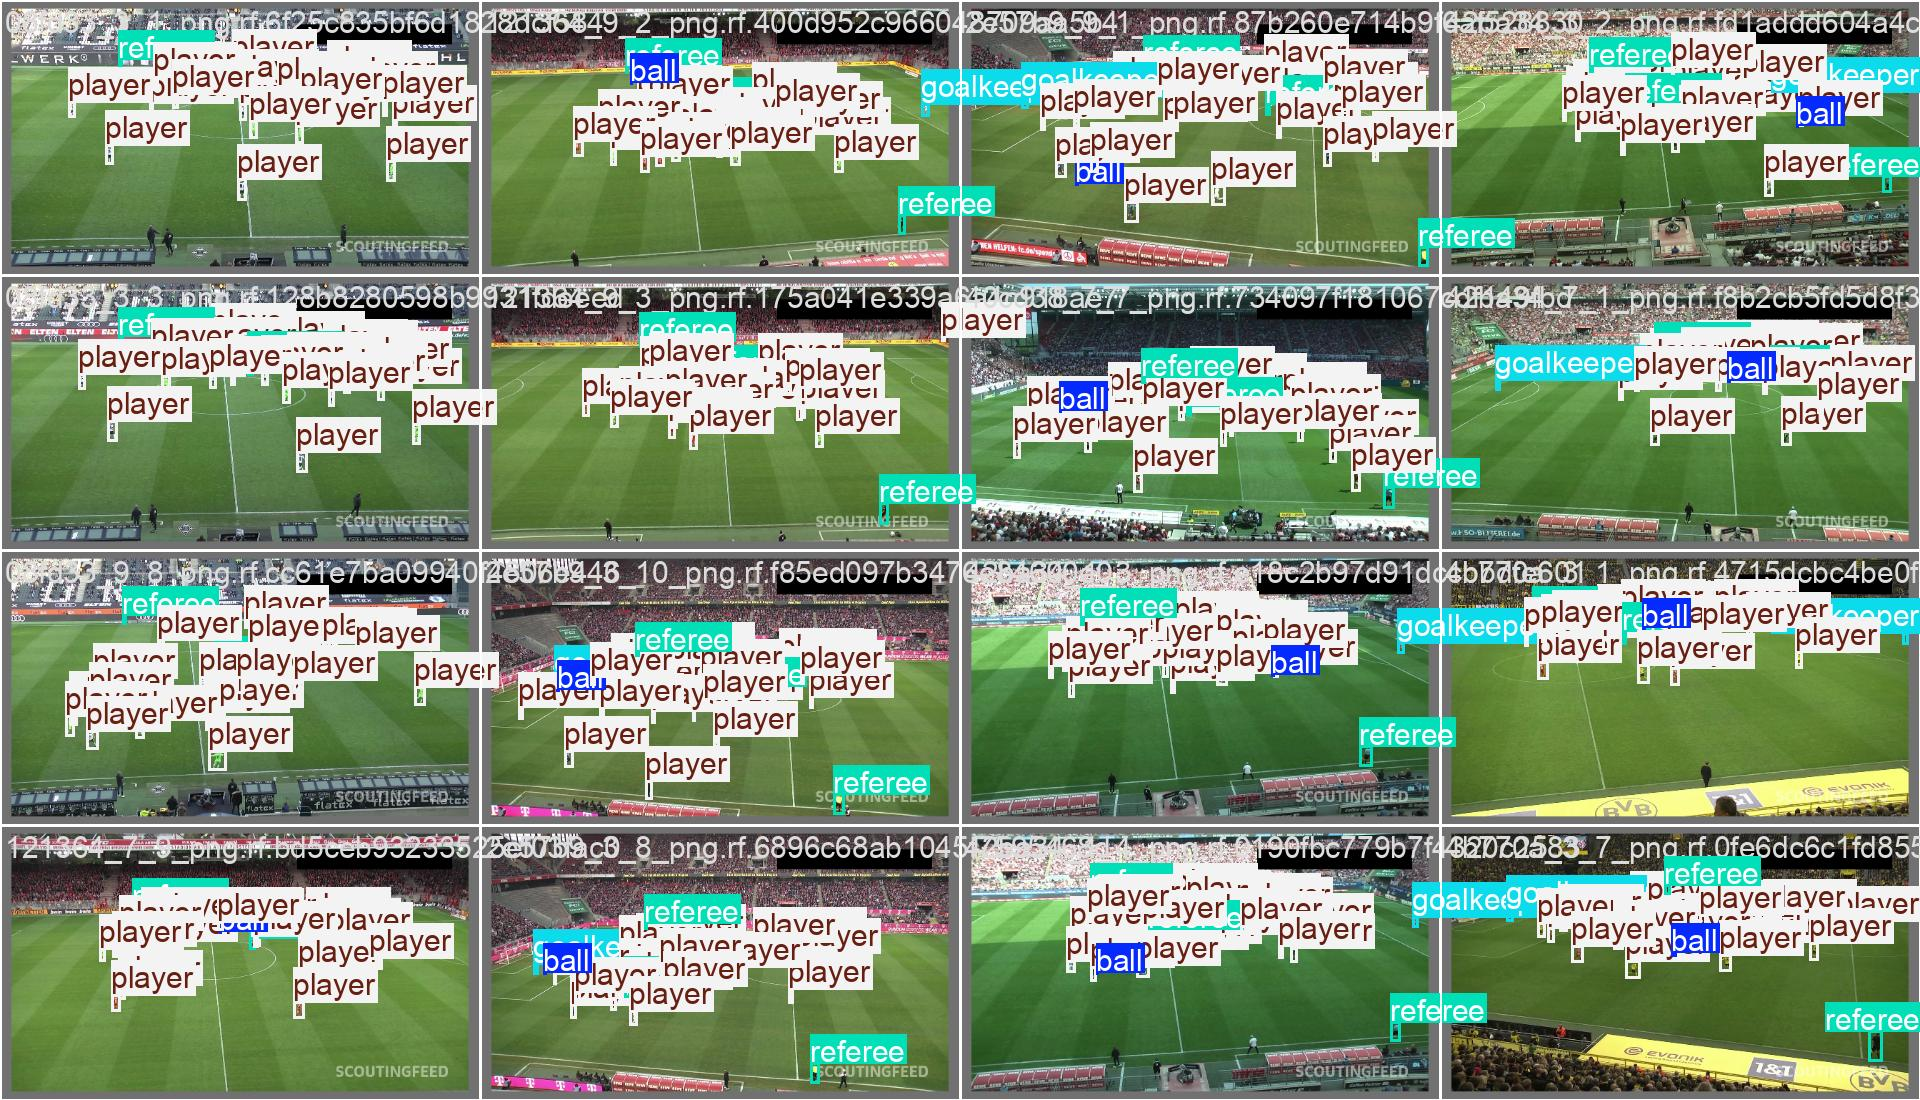

In [12]:
Image("/content/runs/detect/train/val_batch0_labels.jpg")

In [10]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
result = model.predict("/content/maxresdefault (2).jpg", save = True)


image 1/1 /content/maxresdefault (2).jpg: 384x640 1 ball, 15 players, 25.8ms
Speed: 2.0ms preprocess, 25.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


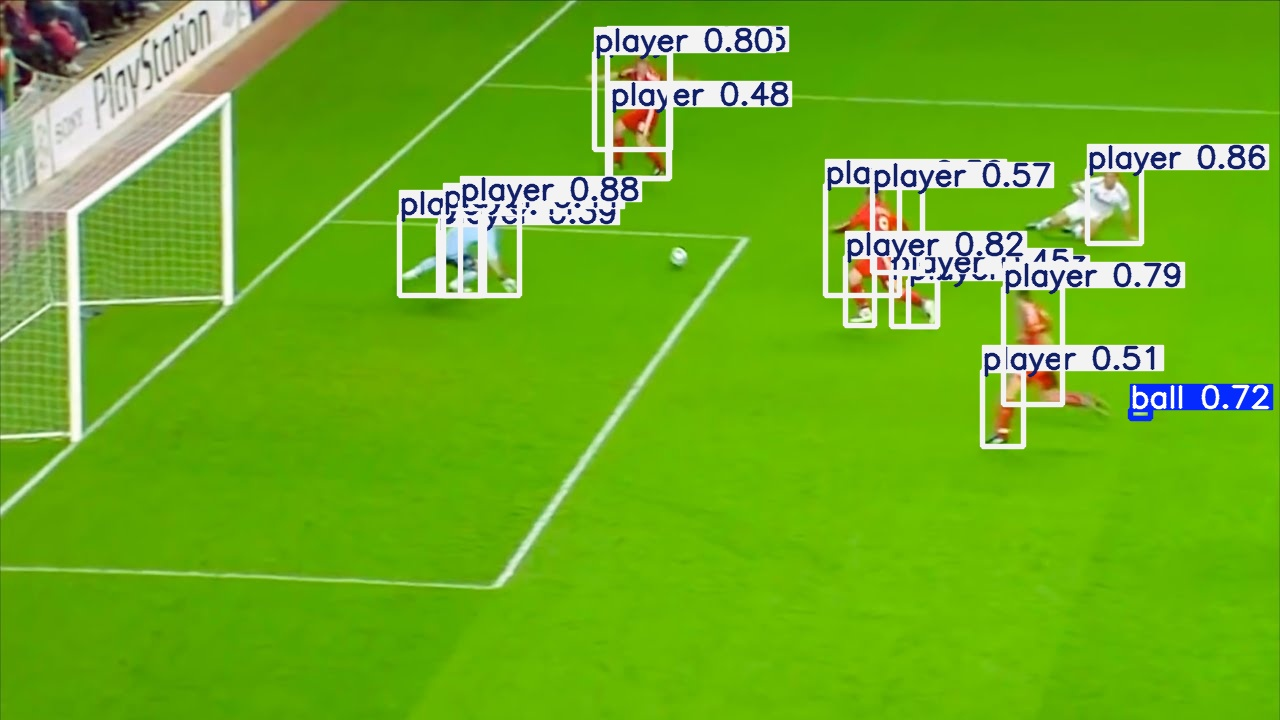

In [11]:
Image("/content/runs/detect/predict/maxresdefault (2).jpg")

In [13]:
result = model.predict("/content/08fd33_4.mp4", save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/08fd33_4.mp4: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 25.3ms
video 1/1 (frame 2/750) /content/08fd33_4.mp4: 384x640 1 ball, 1 goalkeeper, 17 players, 3 referees, 27.2ms
video 1/1 (frame 3/750) /content/08fd33_4.mp4: 384x640 1 goalkeeper, 18 players, 3 referees, 25.2ms
video 1/1 (frame 4/750) /content/08fd33_4.mp4: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 25.2ms
video 1/1 (frame 5/750) /content